# 6.2 Exercise: Titanic Case Study Part 1
author: Rachel Nelson

class: DSC550-T302 Data Mining (2215-1)#%%

# Titanic Tutorial Part 1
### Graphics Analysis

In [127]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Step 1:  Load data into a dataframe
addr1 = "C:/Users/emera/Downloads/week-6/week-6/train.csv"
data = pd.read_csv(addr1)

In [ ]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

In [115]:
#Step 3:  Look at the data
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [122]:
#4.	Think about some questions that might help you predict who will survive:
#a.	What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
print("Variable Information")
data.info()

Variable Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [123]:
#b.	Are the numerical variables correlated?
print("Correlation Matrix")
data.corr()

Correlation Matrix


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

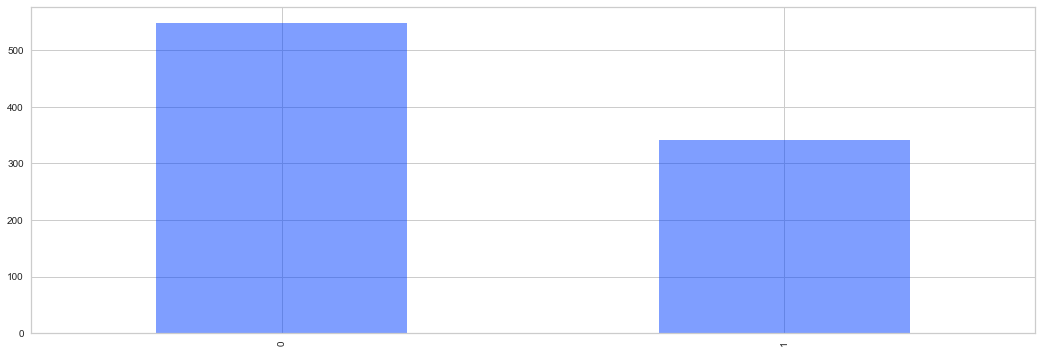

In [125]:
#c.	Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?

fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure
data.Survived.value_counts().plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

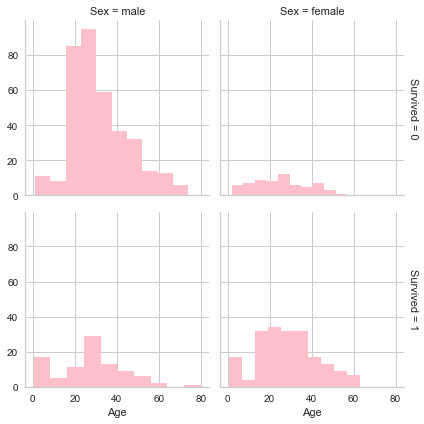

In [130]:
#d.	Are there different survival rates in different categories? For example, did more women survived than man?
g = sns.FacetGrid(data, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="pink");

In [118]:
#5.	Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summarized Data
                       Name   Sex  Ticket        Ca

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

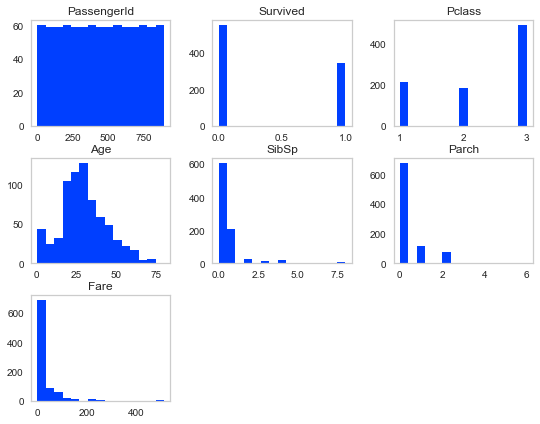

In [132]:
#6.	Make some histograms of your data (“A picture is worth a thousand words!”)
data.hist(bins=15,figsize=(9,7),grid=False)
#a.	Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than $50. There are very few tickets sold where the fare was over $500.

Text(0.5, 1.0, 'Passengers per boarding location')

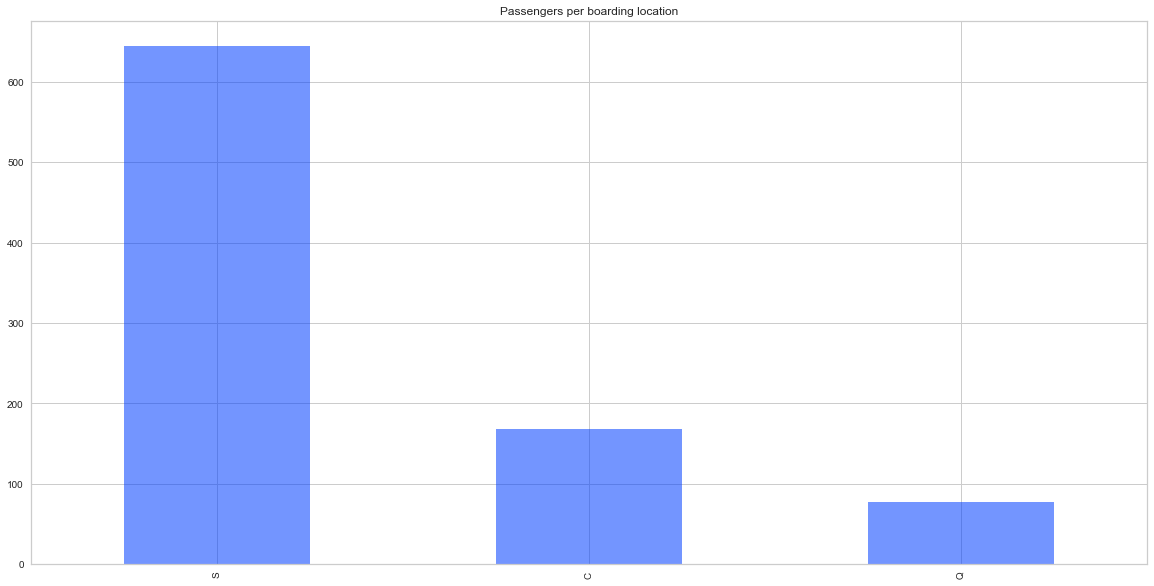

In [133]:
#7.	Make some bar charts for variables with only a few options.
#a.	Ticket and Cabin have more than 100 variables so don’t do those!
data.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location")


Text(0.5, 1.0, 'Passengers Sex')

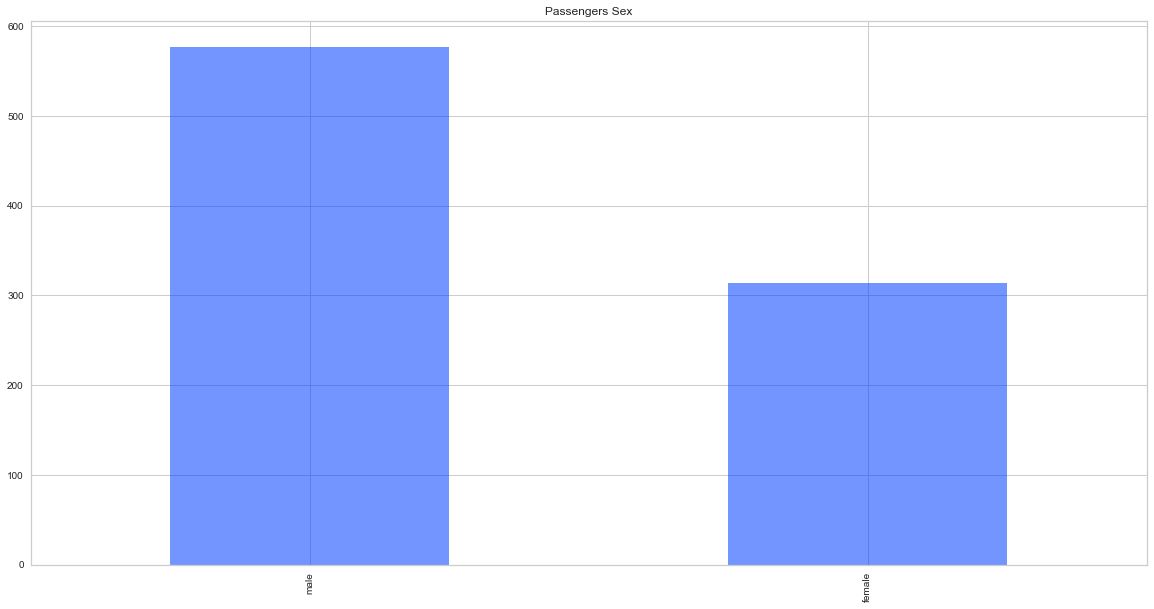

In [134]:
data.Sex.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers Sex")



Text(0.5, 1.0, 'Passengers Age')

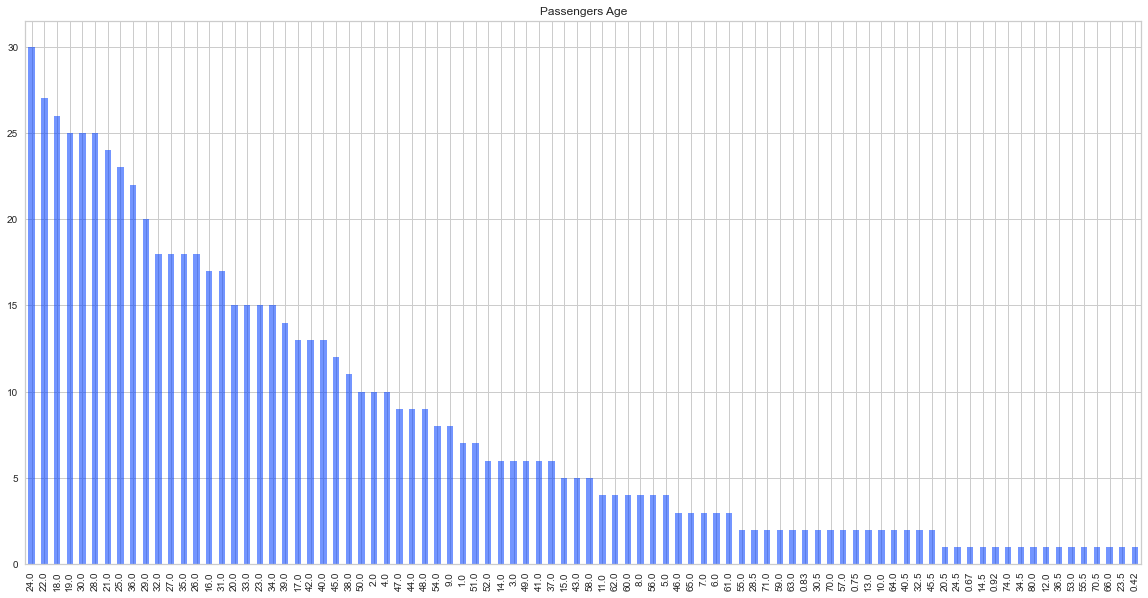

In [135]:
data.Age.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers Age")


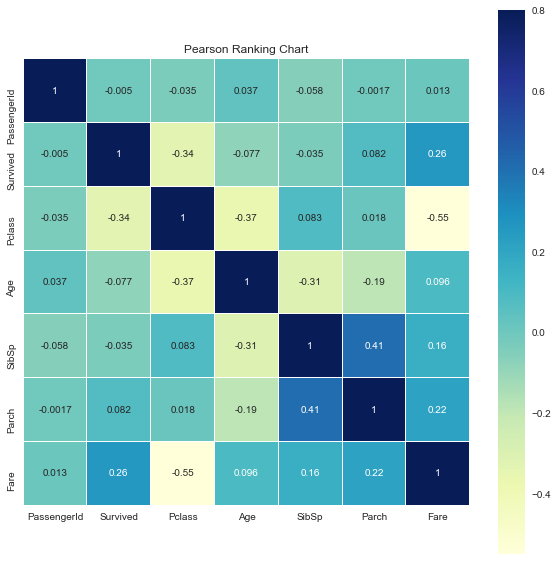

In [137]:
#8.	To see if the data is correlated, make some Pearson Ranking charts
corr=data.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Pearson Ranking Chart');
#a.	Notice that in my sample code, I have saved this png file.
#b.	The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.

In [165]:
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
X = data[num_features].to_numpy()

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

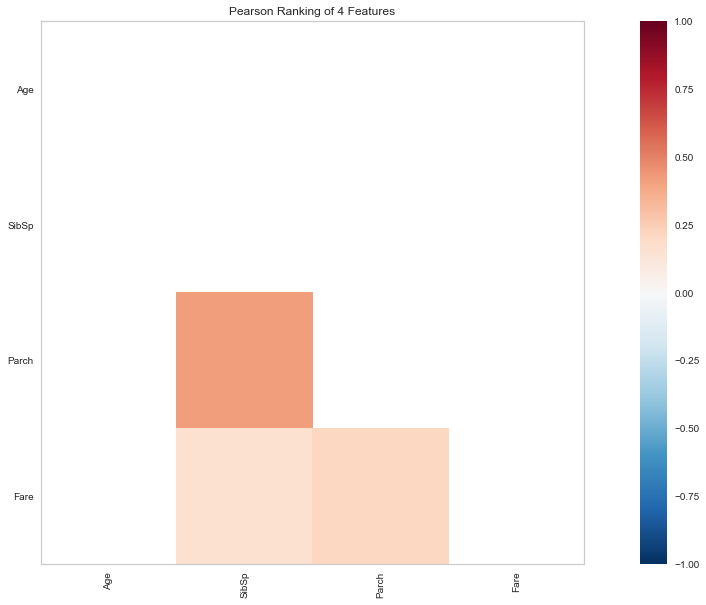

In [167]:
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data
#plt.show()

In [153]:
#9.	 Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
#a.	 That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.

In [154]:
# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

In [155]:
# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [156]:
# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

In [157]:
# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data.Survived.to_numpy()

In [162]:
# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

In [168]:
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
#plt.show()


<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

<Figure size 1440x720 with 0 Axes>

#10.	Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
#a.	More females survived than men.  3rd Class Tickets had a lower survival rate.  Also, Embarkation from Southampton port had a lower survival rate.

In [174]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

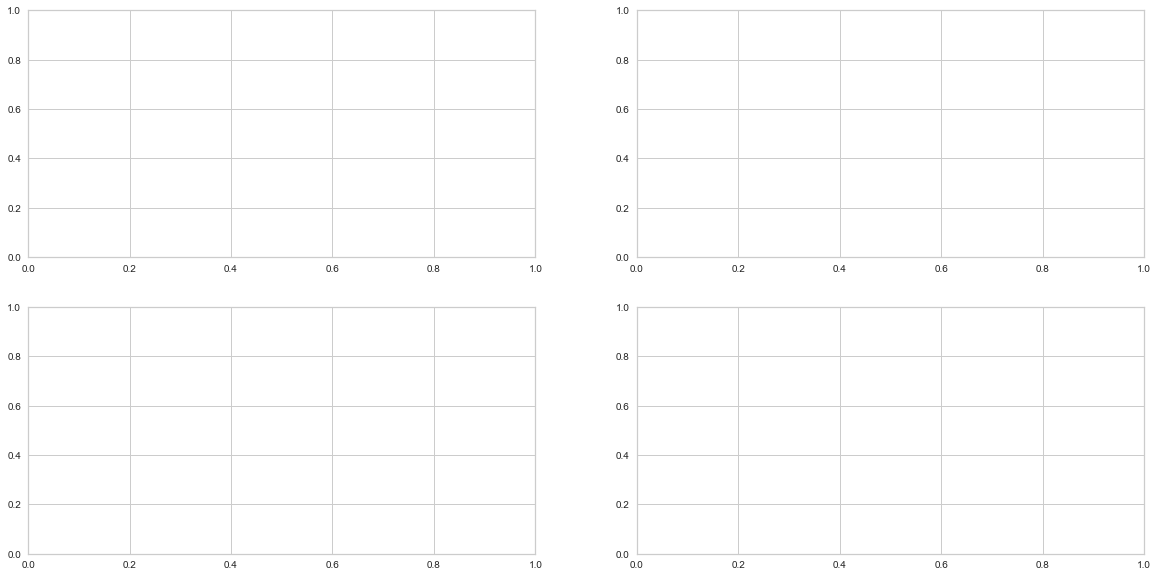

In [175]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

In [176]:
# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

In [178]:
# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

In [179]:
# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
#plt.show()
